In [1]:
import pandas as pd
import lxml.html
import requests

In [128]:
# covid-19 사이트
res = requests.get('https://www.who.int/emergencies/diseases/novel-coronavirus-2019/events-as-they-happen')

In [129]:
root = lxml.html.fromstring(res.text)

In [130]:
# root 엘리멘탈 확인
root

<Element html at 0x208a9c15278>

In [133]:
content = root.cssselect('#PageContent_C003_Col01')[0].text_content() # div id

In [97]:
content = root.cssselect('.sf_colsIn.col-md-10')[0].text_content() #class로 불러오기

In [134]:
root.cssselect('#PageContent_C003_Col01') #div id  testing

[<Element div at 0x208a74eec28>]

In [98]:
root.cssselect('.sf_colsIn.col-md-10') #div class testing

[<Element div at 0x208a9d328b8>]

In [135]:
content

'\r\n    \r\n    \r\n    \r\n    \r\n    \r\n\r\n\r\n\r\n    \r\n    \r\n\r\n\r\n\r\n    \r\n\r\n\r\n    \r\n\r\n\r\n\r\n    \r\n        \r\n                Summary\r\n\r\n            \r\n                \r\n                \r\n            \r\n\r\n                \r\n                    • A pneumonia of unknown cause detected in Wuhan, China was first reported to the WHO Country Office in China on 31 December 2019. \n• WHO is working 24/7 to analyse data, provide advice, coordinate with partners, help countries prepare, increase supplies and manage expert networks.\n• The outbreak was declared a Public Health Emergency of International Concern on 30 January 2020. \n\n• The international community has asked for US$675 million to help protect states with weaker health systems as part of its Strategic Preparedness and Response Plan. \n• On 11 February 2020, WHO announced a name for the new coronavirus disease: COVID-19.\n• To stay up to date, follow @DrTedros and @WHO on Twitter, read WHO

In [136]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')
# english 접두사 Ex) And/to/the/etc.. 제거

In [137]:
tdm = cv.fit_transform([content]).toarray()
tdm

array([[19,  1,  1, ...,  1,  1,  1]], dtype=int64)

In [138]:
df = pd.DataFrame({
    'word': cv.get_feature_names(),
    'freq': tdm.flat
})

In [139]:
df

,word,freq
0,000,19
1,000situation,1
2,02skex6uw8,1
3,0kghralipq,1
4,0mwl15ofkt,1
...,...,...
2418,𝙩𝙤,1
2419,𝙫𝙞𝙧𝙪𝙨,1
2420,𝙬𝙤𝙧𝙠,1
2421,𝙮𝙤𝙪,1


In [140]:
df.sort_values('freq', ascending=False).head(20)

,word,freq
585,covid,184
19,19,177
1026,health,136
41,2020,113
1354,march,90
1223,key,78
1368,materials,77
686,director,70
946,general,69
2332,world,64


In [141]:
from wordcloud import WordCloud

In [142]:
wc = WordCloud(width=400, height=400, background_color='white')
#wc = WordCloud(font_path='C:\Windows\Fonts\malgun.ttf', width=400, height=400, background_color='white')
# 한글 파일일 경우 폰트 지정할 것.

In [143]:
frequencies = {word: freq for word, freq in zip(cv.get_feature_names(), tdm.flat)}
# dictionery 형태로 변경

In [144]:
wc.fit_words(frequencies)

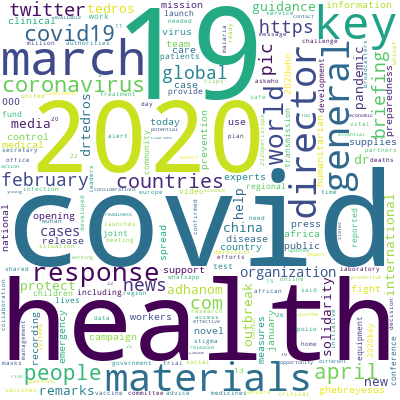

In [145]:
wc.to_image()

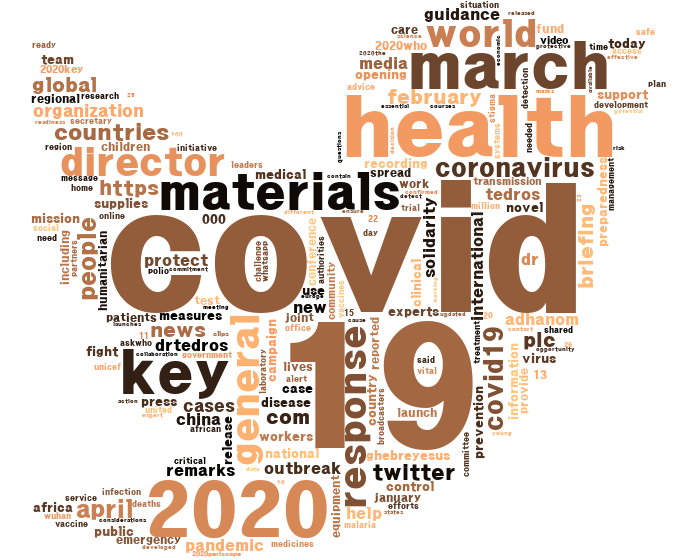

In [182]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

wc = WordCloud(
    font_path='C:\\Windows\\Fonts\\HMKMRHD.TTF',
    width=800,
    height=800,
    background_color='white',
    colormap = "copper", # 폰트 색 설정
    mask = np.array(Image.open('twiter.png'))
)

frequencies = {word:freq for word, freq in zip(cv.get_feature_names(), tdm.flat)}

wc.fit_words(frequencies)

wc.to_image()

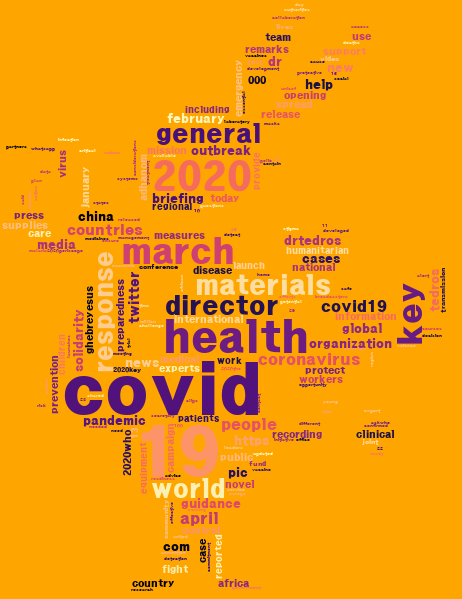

In [199]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

wc = WordCloud(
    font_path='C:\\Windows\\Fonts\\HMKMRHD.TTF',
    width=800,
    height=800,
    background_color='orange',
    colormap = "magma", # 폰트 색 설정
    mask = np.array(Image.open('rabbit.png'))
)

frequencies = {word:freq for word, freq in zip(cv.get_feature_names(), tdm.flat)}

wc.fit_words(frequencies)

wc.to_image()

In [185]:
import matplotlib.font_manager as fm
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
font_list[:] # 폰트 리스트

['C:\\Windows\\Fonts\\comsc.ttf',
 'C:\\Windows\\Fonts\\ENBRUSH.TTF',
 'C:\\Windows\\Fonts\\NIAGSOL.TTF',
 'C:\\Windows\\Fonts\\BRLNSB.TTF',
 'C:\\Windows\\Fonts\\ROCK.TTF',
 'C:\\Windows\\Fonts\\FREESCPT.TTF',
 'C:\\Windows\\Fonts\\georgiaz.ttf',
 'C:\\Windows\\Fonts\\Sitka.ttc',
 'C:\\Windows\\Fonts\\trebuc.ttf',
 'C:\\Windows\\Fonts\\TCM_____.TTF',
 'C:\\Windows\\Fonts\\HMKMAMI.TTF',
 'C:\\Windows\\Fonts\\BASKVILL.TTF',
 'C:\\Windows\\Fonts\\verdanab.ttf',
 'C:\\Windows\\Fonts\\georgiab.ttf',
 'C:\\Windows\\Fonts\\msjhbd.ttc',
 'C:\\Windows\\Fonts\\calibrib.ttf',
 'C:\\Windows\\Fonts\\HANDotum.ttf',
 'C:\\Windows\\Fonts\\simsunb.ttf',
 'C:\\Windows\\Fonts\\YBLA05.TTF',
 'C:\\Windows\\Fonts\\l_10646.ttf',
 'C:\\Windows\\Fonts\\consolai.ttf',
 'C:\\Windows\\Fonts\\HANCooljazzL.ttf',
 'C:\\Windows\\Fonts\\H2PORM.TTF',
 'C:\\Windows\\Fonts\\HYGTRE.TTF',
 'C:\\Windows\\Fonts\\mtproxy9.ttf',
 'C:\\Windows\\Fonts\\comicbd.ttf',
 'C:\\Windows\\Fonts\\BOD_BLAI.TTF',
 'C:\\Windows\\Fonts\\BRL

In [167]:
#colormap list 폰트 색상

'''Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, 
CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, 
OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, 
Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr,
PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu,
RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2,
Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, 
YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, 
autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis,
cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, 
cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, 
gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r,
gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r,
gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r,
magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r,
plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spring,
spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r,
tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted,
twilight_shifted_r, viridis, viridis_r, winter, winter_r'''

'Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, \nCMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, \nOrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, \nPastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr,\nPuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu,\nRdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2,\nSet2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, \nYlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, \nautumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis,\ncividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, \ncubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, \ngist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r,\ngist_stern, gist_stern_r, gist_yarg, gist_yarg_r